# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
#Давайте сначала определим общее количество людей, у которых есть определенное количество детей или же нет детей вовсе.
print(data.groupby('children')['debt'].count())

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64


In [24]:
#Псосле чего определим у скоьких из них есть задолженность перед банком
print(data.groupby('children')['debt'].sum())

children
0    1063
1     444
2     194
3      27
4       4
5       0
Name: debt, dtype: int64


In [25]:
#Далее подсчитаем среднее количество людей с задолженостью в каждой из категорий 
#можно разделить перове значение на второе или воспользоваться методом mean(), умножим полученные значения на 100 для перевода в проценты
print(data.groupby('children')['debt'].mean()*100)

children
0    7.543822
1    9.234609
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64


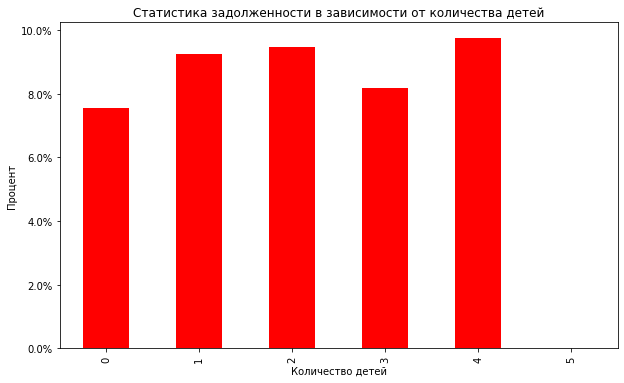

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df_children = data.groupby('children')['debt'].mean() * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_children.plot(kind='bar', color='red')

plt.xlabel('Количество детей')
plt.ylabel('Процент')
plt.title('Статистика задолженности в зависимости от количества детей')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


**Вывод**:
Исследование показывает, что процент людей с задолженностью перед банком варьируется в зависимости от наличия детей. Доля людей без детей, имеющих задолженность перед банком, составляет 7,54%. Среди родителей с детьми эта цифра выше: 9,23% с одним ребенком и 9,45% с двумя детьми имеют задолженность перед банком. У семей с тремя детьми этот показатель снижается до 8,18%, а у семей с четырьмя детьми 9,75% находятся в должниках.

Эти данные свидетельствуют о том, что наличие детей может увеличивать риск задолженности перед банком. Вероятно, это связано с дополнительными финансовыми обязательствами, которые несут родители, заботясь о своих детях.  

Заметим, что трех детей имеют 330 сесмей, 4-ех детей имеют 41 семья, а 5 детей есть у 9 семей, эти три категории имеют маленький размер выборки, поэтому  по ним нельзя делть каких-либо выводов

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Аналогично заданию 2.7.1, изанчально определяем общее количество людей в каждой из категорий family_status. После определяем количество должников и считаем процент должников в каждой категории.

In [26]:
print(data.groupby('family_status')['debt'].count())

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: debt, dtype: int64


In [27]:
print(data.groupby('family_status')['debt'].sum())

family_status
Не женат / не замужем    273
в разводе                 84
вдовец / вдова            63
гражданский брак         385
женат / замужем          927
Name: debt, dtype: int64


In [28]:
print(data.groupby('family_status')['debt'].mean()*100)

family_status
Не женат / не замужем    9.763948
в разводе                7.064760
вдовец / вдова           6.624606
гражданский брак         9.313014
женат / замужем          7.560558
Name: debt, dtype: float64


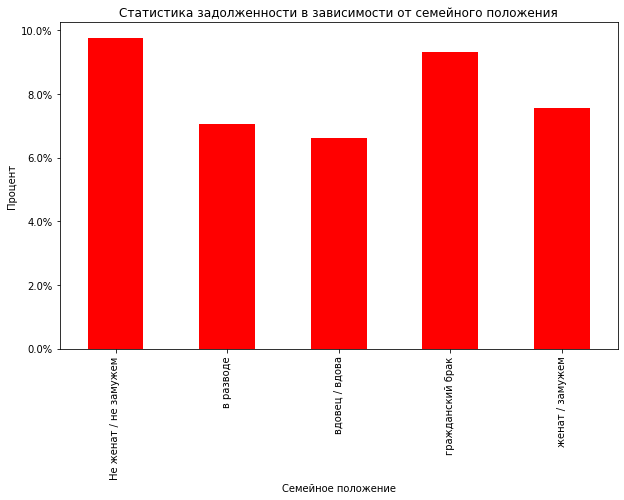

In [41]:
df_family_status = data.groupby('family_status')['debt'].mean()*100

fig, ax = plt.subplots(figsize=(10, 6))
df_family_status.plot(kind='bar', ax=ax, color = 'red')

plt.xlabel('Семейное положение')
plt.ylabel('Процент')
plt.title('Статистика задолженности в зависимости от семейного положения')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

**Вывод:** 
Среди различных категорий заемщиков, наименьший процент должников наблюдается среди вдовцов и вдов (6.62%). Задолженность встречается у 7.06% людей, находящихся в разводе, и у 7.56% женатых/замужних. Люди в гражданском браке имеют задолженность в 9.31% случаев, а среди тех, кто не женат/не замужем, этот показатель составляет 9.76%.
Причиныами таких показателей могли стать различные факторы, например:
1)Вдовцы/вдовы, возможно, имеют более устойчивую финансовую ситуацию благодаря наличию собственности или страховых выплат.
2)Развод может сопровождаться стрессом и финансовыми трудностями, что может влиять на способность выплачивать долги.
3)В семейных парах, где партнеры состоят в официальном браке, распределение финансовых обязательств может быть более четким и эффективным.В гражданском же браке или не состоящих в браке парах, отсутствие официального статуса может привести к менее строгому учету совместных финансов.
4)Люди, не состоящие в браке, могут иметь более стабильную финансовую ситуацию, что способствует более низкому проценту должников.

In [29]:
#Можно сделать все в одной таблице, так она получается информативнее и более легкой для восприятия, спасибо за замечание
print(data.groupby('family_status')['debt'].agg(count='count',sum='sum',mean=lambda x: x.mean() * 100))


                       count  sum      mean
family_status                              
Не женат / не замужем   2796  273  9.763948
в разводе               1189   84  7.064760
вдовец / вдова           951   63  6.624606
гражданский брак        4134  385  9.313014
женат / замужем        12261  927  7.560558


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Аналогично заданию 2.7.1 и 2.7.2, изанчально определяем общее количество людей в каждой из категорий total_income_category. После определяем количество должников и считаем процент должников в каждой категории.

In [30]:
print(data.groupby('total_income_category')['debt'].count())

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: debt, dtype: int64


In [31]:
print(data.groupby('total_income_category')['debt'].sum())

total_income_category
A       2
B     354
C    1353
D      21
E       2
Name: debt, dtype: int64


In [32]:
print(data.groupby('total_income_category')['debt'].mean()*100)

total_income_category
A    8.000000
B    7.060231
C    8.498210
D    6.017192
E    9.090909
Name: debt, dtype: float64


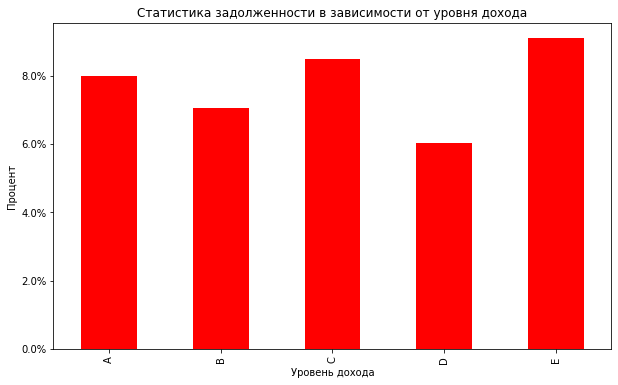

In [42]:
df_total_income_category = data.groupby('total_income_category')['debt'].mean()*100

fig, ax = plt.subplots(figsize=(10, 6))
df_total_income_category.plot(kind='bar', color = 'red')

plt.xlabel('Уровень дохода')
plt.ylabel('Процент')
plt.title('Статистика задолженности в зависимости от уровня дохода')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

**Вывод:** 
Наименьший процент должников наблюдается в группе D, имеющий доход от 30000 до 50000. Это может свидетельствовать о том, что люди с уровнем дохода в этом диапазоне чаще всего справляются с финансовыми обязательствами. Группа заемщиков с наименьшим уровнем дохода E (до 30 000) имеет самый высокий процент должников (9.09%). Это может быть объяснено ограниченными финансовыми ресурсами и возможностями в погашении долгов. Среди людей с доходом от 50000 процент должников находится в диапозоне от 7 до 8.5 %.Заемщики с доходом C (50 001 - 200 000) имеют процент должников 8.50%. Вероятно, это связано с тем, что в данной категории доходов есть больший разброс, что может привести к различным финансовым обязательствам.

В категориях A и E всего 25 и 22 человека соотвественно, по ним мы не можем делать каких-либо выводов из-за недостаточного объема информации

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Аналогично заданию 2.7.1, 2.7.2 и 2.7.3, изанчально определяем общее количество людей в каждой из категорий purpose_category. После определяем количество должников и считаем процент должников в каждой категории.

In [33]:
print(data.groupby('purpose_category')['debt'].count())

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64


In [34]:
print(data.groupby('purpose_category')['debt'].sum())

purpose_category
операции с автомобилем      400
операции с недвижимостью    780
получение образования       369
проведение свадьбы          183
Name: debt, dtype: int64


In [35]:
print(data.groupby('purpose_category')['debt'].mean()*100)

purpose_category
операции с автомобилем      9.347978
операции с недвижимостью    7.255139
получение образования       9.252758
проведение свадьбы          7.911803
Name: debt, dtype: float64


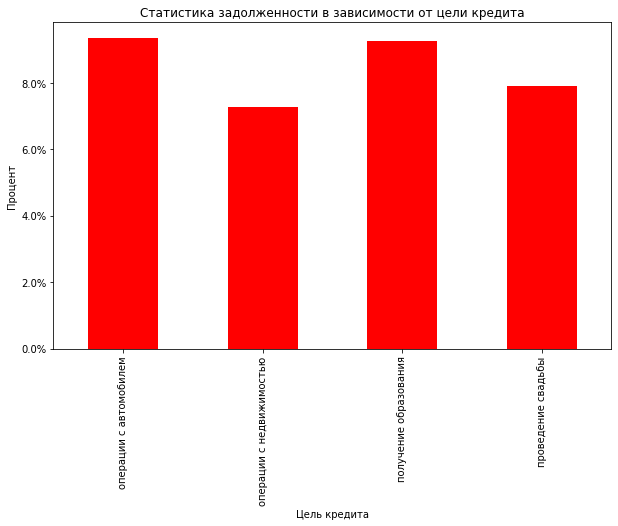

In [43]:
df_purpose_category = data.groupby('purpose_category')['debt'].mean()*100

fig, ax = plt.subplots(figsize=(10, 6))
df_purpose_category.plot(kind='bar', color = 'red')

plt.xlabel('Цель кредита')
plt.ylabel('Процент')
plt.title('Статистика задолженности в зависимости от цели кредита')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

**Вывод:** 
Исходя из предоставленной таблицы, можно сделать следующие выводы: 
1)Операции с автомобилем (9.35%): Эта категория имеет самый высокий процент должников. Вероятно, это связано с тем, что операции с автомобилями часто требуют значительных финансовых затрат, и некоторые заемщики могут столкнуться с трудностями в погашении кредитов.
2)Операции с недвижимостью (7.26%): В этой категории процент должников ниже, чем в категории с автомобилями. Это может быть связано с тем, что операции с недвижимостью чаще имеют долгосрочный характер, и заемщики более ответственно подходят к таким сделкам.
3)Получение образования (9.25%): Эта категория также имеет высокий процент должников, что может быть связано с тем, что образование может быть длительным процессом с накоплением расходов.
4)Проведение свадьбы (7.91%): Эта категория имеет ниже средний процент должников. Вероятно, свадьба как событие может иметь менее значимый финансовый вклад, по сравнению с другими категориями.
Общий вывод: Из анализа видно, что категории "Операции с автомобилем" и "Получение образования" имеют более высокий процент должников, что может требовать дополнительного внимания и анализа для разработки более эффективных кредитных стратегий в этих областях.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
Пропуски в исходных данных могут возникать по разным причинам, например:
1)Ошибка при сборе данных: В процессе сбора данных могут возникнуть сбои или ошибки, что приводит к неполным или некорректным данным.
2)Отсутствие информации: Некоторые атрибуты могут быть просто недоступны для записи. Например, если определенное измерение невозможно выполнить, соответствующее значение данных будет отсутствовать.
3)Ошибки при передаче данных: При передаче данных по сети могут возникнуть ошибки, приводящие к потере части данных.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
Заполнение пропусков медианным значением может быть хорошим решением в первую очередь из-за того, что Медиана представляет собой центральную точку распределения данных и не подвержена влиянию крайних значений, если в данных есть выбросы или аномальные значения, то медиана будет менее чувствительна к ним, чем среднее. Это может быть особенно важно в случаях, когда выбросы несут в себе ошибки или аномалии. Также медиану можно вычислить относительно быстро и не сложно, что делает этот метод простым и эффективным. (в своем исследовании мы использовали среднее так как работали с качественным показателем debt)


### Шаг 4: общий вывод.

Из проведенного анализа данных видно, что наличие детей может увеличивать риск задолженности перед банком. Вероятно, это связано с дополнительными финансовыми обязательствами, которые несут родители, заботясь о своих детях.

Среди различных категорий заемщиков, наименьший процент должников наблюдается среди вдовцов и вдов (6.62%). Задолженность встречается у 7.06% людей, находящихся в разводе, и у 7.56% женатых/замужних. Люди в гражданском браке имеют задолженность в 9.31% случаев, а среди тех, кто не женат/не замужем, этот показатель составляет 9.76%. Возможные причины таких различий могут быть связаны с разными финансовыми обстоятельствами, которые характерны для каждой из этих групп.

Среди разных уровней дохода, заемщики с доходом в диапазоне от 30,000 до 50,000 имеют наименьший процент должников, что может свидетельствовать о их более устойчивой финансовой ситуации. Самый высокий процент должников наблюдается среди заемщиков с доходом менее 30,000 (группа E).

Анализ категорий кредитных целей показал, что операции с автомобилем имеют самый высокий процент должников (9.35%), возможно из-за значительных финансовых затрат, связанных с этой категорией.

В целом, из анализа можно сделать вывод, что разные факторы, такие как наличие детей, семейное положение, уровень дохода и цель кредита, могут существенно влиять на вероятность задолженности перед банком. Эти выводы представляют важную информацию для разработки более эффективных кредитных стратегий и оценки рисков.

Изучил отправленные вами материалы, добавил визуализацию, но получилось сделать красивый график только для одного показателя (mean()*100), пробовал сделать график с всеми тремя метриками(count, sum, mean), получилось не информативно(см. график ниже), подскажите пожалуйста, как можно объеденить три графика в один, и стоит ли вообще так делать ? 

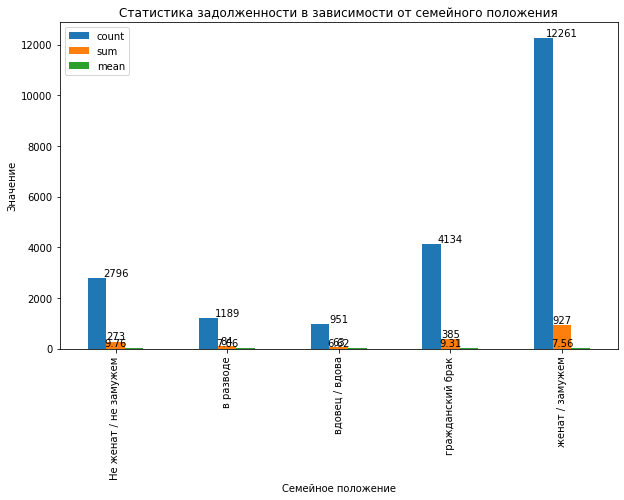

In [45]:
import matplotlib.pyplot as plt

df = data.groupby('family_status')['debt'].agg(count='count', sum='sum', mean=lambda x: x.mean() * 100)

fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='bar', ax=ax)

plt.xlabel('Семейное положение')
plt.ylabel('Значение')
plt.title('Статистика задолженности в зависимости от семейного положения')

for i, value in enumerate(df.values):
    plt.text(i, value[0] + 0.1, f'{value[0]:.0f}', ha='center', va='bottom')
    plt.text(i, value[1] + 0.1, f'{value[1]:.0f}', ha='center', va='bottom')
    plt.text(i, value[2] + 0.1, f'{value[2]:.2f}', ha='center', va='bottom')

plt.show()
